In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the dataset 
df = pd.read_csv('corona.csv')
df

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1081,2.0,2/25/2020,NaN,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaN,...,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...,NaN,NaN,NaN,NaN,NaN,NaN
1081,1082,1.0,2/24/2020,NaN,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaN,...,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...,NaN,NaN,NaN,NaN,NaN,NaN
1082,1083,1.0,2/26/2020,NaN,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,...,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...,NaN,NaN,NaN,NaN,NaN,NaN
1083,1084,1.0,2/25/2020,NaN,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,NaN,...,0,NaN,Reuters,https://www.reuters.com/article/us-croatia-cor...,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1085 non-null   int64  
 1   case_in_country        888 non-null    float64
 2   reporting date         1084 non-null   object 
 3   Unnamed: 3             0 non-null      float64
 4   summary                1080 non-null   object 
 5   location               1085 non-null   object 
 6   country                1085 non-null   object 
 7   gender                 902 non-null    object 
 8   age                    843 non-null    float64
 9   symptom_onset          563 non-null    object 
 10  If_onset_approximated  560 non-null    float64
 11  hosp_visit_date        507 non-null    object 
 12  exposure_start         128 non-null    object 
 13  exposure_end           341 non-null    object 
 14  visiting Wuhan         1085 non-null   int64  
 15  from

In [4]:
df.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(df.columns)


Index(['id', 'case_in_country', 'reporting date', 'Unnamed: 3', 'summary',
       'location', 'country', 'gender', 'age', 'symptom_onset',
       'If_onset_approximated', 'hosp_visit_date', 'exposure_start',
       'exposure_end', 'visiting Wuhan', 'from Wuhan', 'death', 'recovered',
       'symptom', 'source', 'link', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')


In [6]:
import missingno as msno

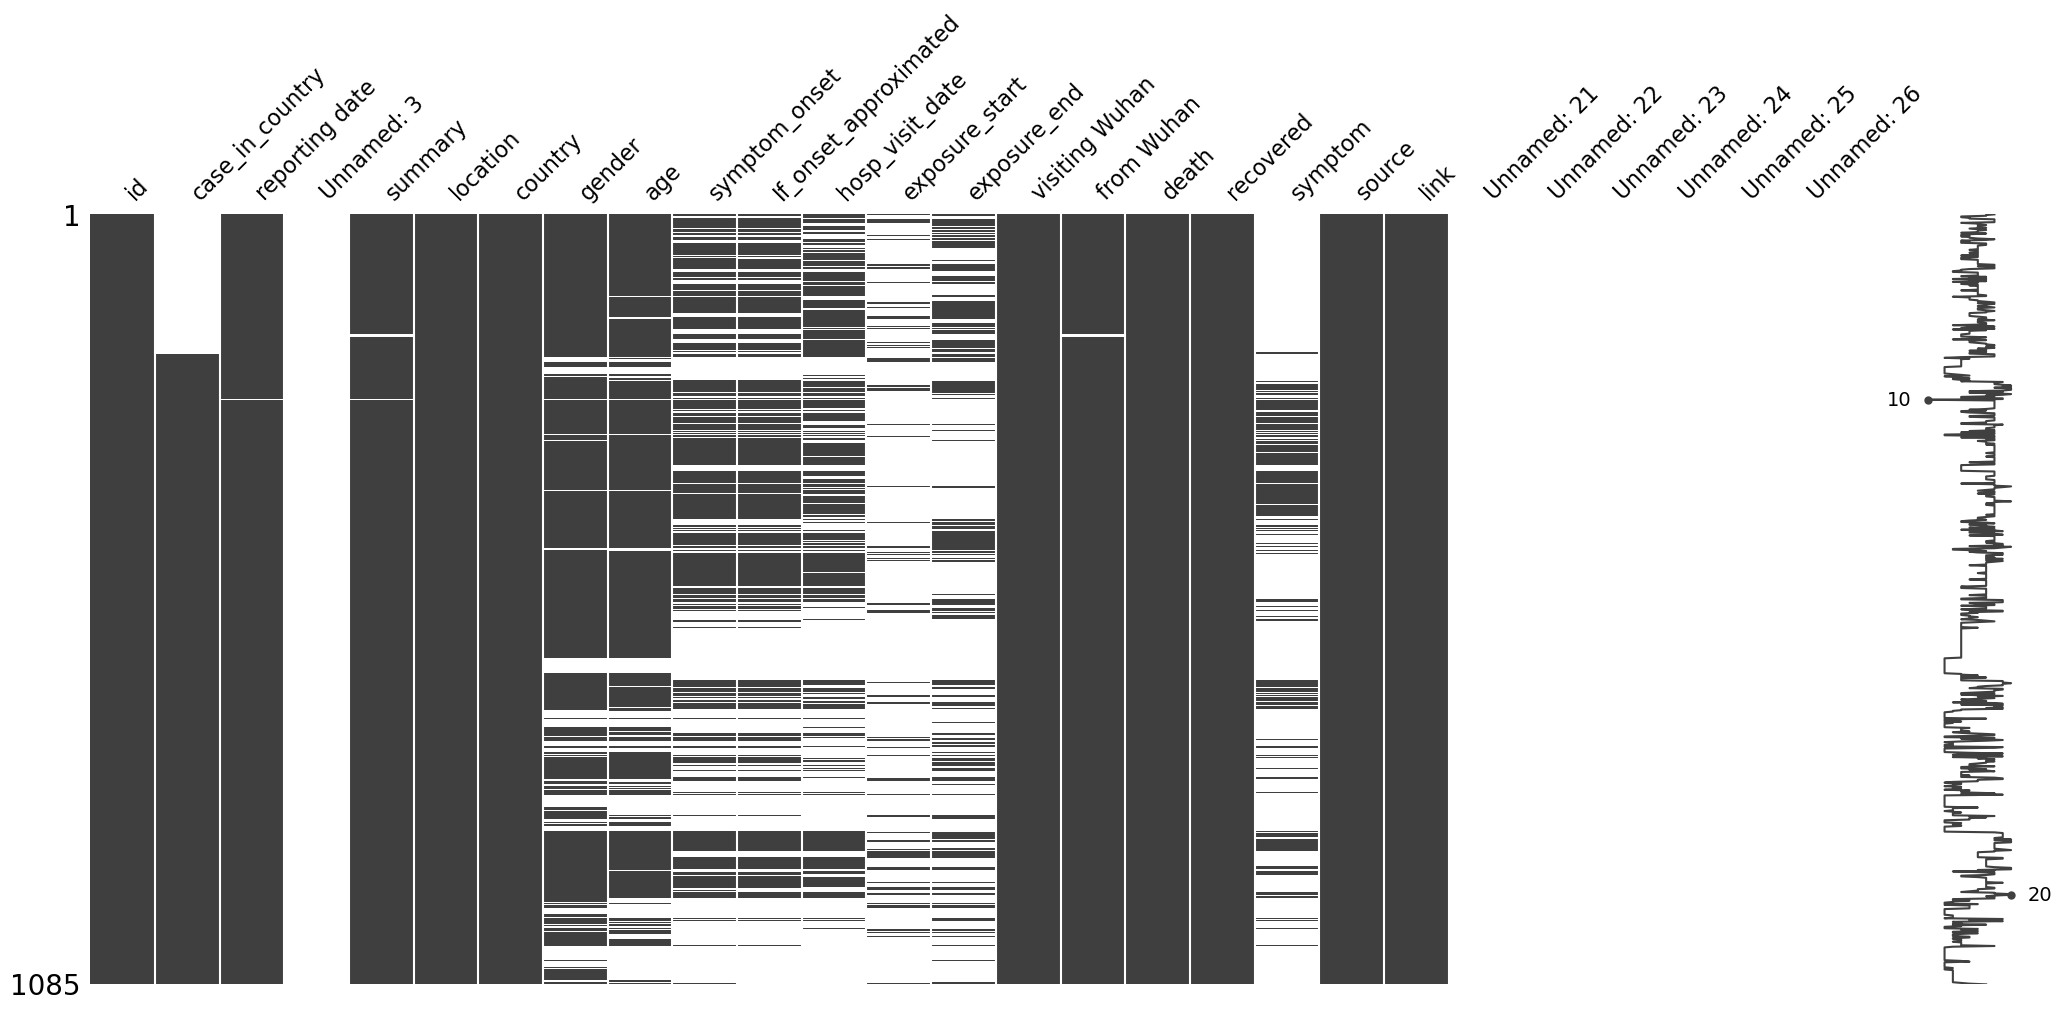

<Figure size 1500x900 with 0 Axes>

In [7]:
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

<Axes: >

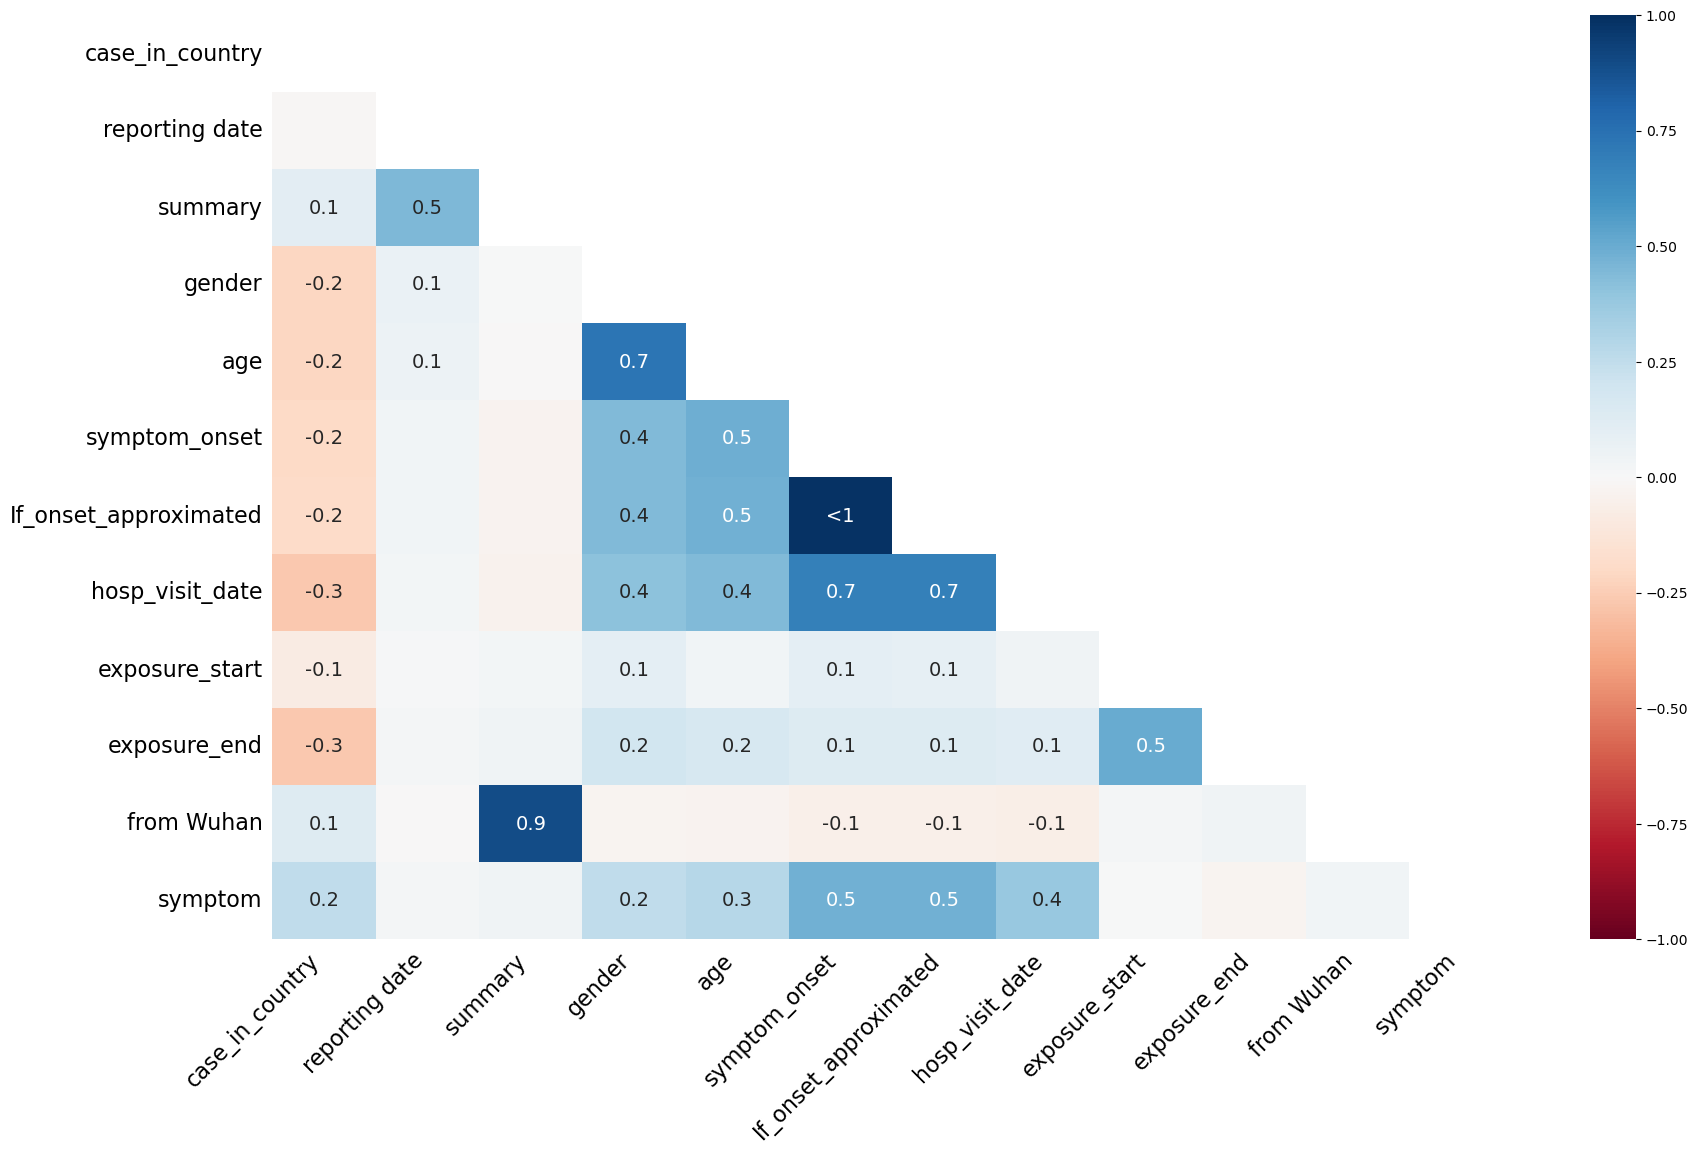

In [8]:
msno.heatmap(df, labels = True)

In [9]:
# Columns having missing values
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
missing_columns

['case_in_country',
 'reporting date',
 'Unnamed: 3',
 'summary',
 'gender',
 'age',
 'symptom_onset',
 'If_onset_approximated',
 'hosp_visit_date',
 'exposure_start',
 'exposure_end',
 'from Wuhan',
 'symptom',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26']

In [10]:
def get_numerical_summary(df):
    total = df.shape[0]
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

In [11]:
missing_percent = get_numerical_summary(df)

case_in_country : 197 (18.157%)
reporting date : 1 (0.092%)
Unnamed: 3 : 1085 (100.0%)
summary : 5 (0.461%)
gender : 183 (16.866%)
age : 242 (22.304%)
symptom_onset : 522 (48.111%)
If_onset_approximated : 525 (48.387%)
hosp_visit_date : 578 (53.272%)
exposure_start : 957 (88.203%)
exposure_end : 744 (68.571%)
from Wuhan : 4 (0.369%)
symptom : 815 (75.115%)
Unnamed: 21 : 1085 (100.0%)
Unnamed: 22 : 1085 (100.0%)
Unnamed: 23 : 1085 (100.0%)
Unnamed: 24 : 1085 (100.0%)
Unnamed: 25 : 1085 (100.0%)
Unnamed: 26 : 1085 (100.0%)


In [12]:
# Drop columns 'id', 'reporting date', 'source', and 'link' from DataFrame
columns_to_drop = ['id', 'reporting date', 'source', 'link','symptom_onset','hosp_visit_date', 'exposure_start', 'exposure_end']
df.drop(columns=columns_to_drop, inplace=True)


In [13]:
df

,case_in_country,Unnamed: 3,summary,location,country,gender,age,If_onset_approximated,visiting Wuhan,from Wuhan,death,recovered,symptom,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,NaN,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,0.0,1,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,0.0,0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,0.0,0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,1,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,2.0,NaN,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1081,1.0,NaN,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1082,1.0,NaN,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1083,1.0,NaN,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Check the number of duplicate rows before removing them
num_duplicates_before = df.duplicated().sum()
print("Number of duplicate rows before removal:", num_duplicates_before)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

Number of duplicate rows before removal: 0


In [15]:
df = pd.get_dummies(df, columns=['gender'], drop_first=True)

In [16]:
df

,case_in_country,Unnamed: 3,summary,location,country,age,If_onset_approximated,visiting Wuhan,from Wuhan,death,recovered,symptom,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,gender_male
0,NaN,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,66.0,0.0,1,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,NaN,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,56.0,0.0,0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,NaN,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,46.0,0.0,0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,NaN,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,60.0,NaN,1,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,NaN,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,58.0,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,2.0,NaN,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,24.0,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1081,1.0,NaN,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,35.0,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1082,1.0,NaN,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1083,1.0,NaN,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
